# COVID-19 Cases 
## Johns Hopkins School of Public Health HDX

### David W Craig.  2020-03-20

[Direct download link from HDX](<https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv&filename=time_series_2019-ncov-Confirmed.csv>)
<-- This will download the data from HDX **in a format appropriate for this notebook.**
It is in their "original" format, which has each country/region's data in a long format in each line of the `.csv` file. 

More formats can be found at:
<https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases>
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv

Here is what is in the working directory after download. This could probably be done even 
more automagically.

**This was made with data from 2020-03-20 originally**

In [3]:
%ls

covid19cases-us-it.png  time_series_2019-ncov-Confirmed.csv
covid-19-data.ipynb


In [4]:
ddata = dict() # dictionary that will hold data initially
with open('time_series_2019-ncov-Confirmed.csv') as datafile:
    reader = csv.reader(datafile)
    head = next(reader) # get the header row
    hprov, hcntry, hlon, hlat, *date_list = head  # separate various part of the header
    for row in reader:  # continue with rest of data
        prov, cntry, lon, lat, *cases = row
        ncases = np.array([int(s) for s in cases])  # force case counts to integer
        ddata.update({(prov, cntry) : ncases})  # key it by (state/province/region, country)
        

Here is what the header line of the data file looks like:

In [5]:
print(', '.join(head))

Province/State, Country/Region, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20


In [6]:
# useful to separate county or other region data from statewide:
st = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
      "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
      "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
      "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", 
      "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina",
      "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
      "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
      "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming", 'District of Columbia',
      'Puerto Rico', 'Virgin Islands', 'Guam'
]

In [7]:
uskeys = [ k for k in ddata.keys() if k[1] =='US']  #all US data

In [8]:
us_st_keys = [(s, 'US') for s in st]   # US data tagged by states/DC/territories only

In [9]:
# since examination of data details shows some cruise ship and county level data
# as of Mar 20, see if there is any significant difference.
us_st_data = np.array([ddata[k] for k in us_st_keys])
usdata = np.array([ddata[k] for k in uskeys])

In [10]:
us_st_totals = np.sum(us_st_data, axis=0)  # totals tagged only by state
ustotals = np.sum(usdata, axis=0)       # All US data

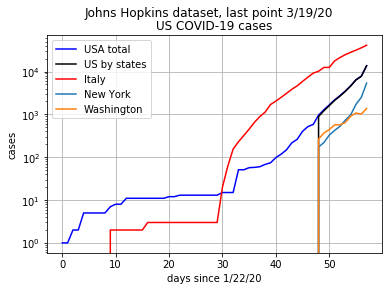

In [11]:
# "Full disclosure" graph to check for duplicates, etc. -- seem insignificant as of 3/20
plt.plot(ustotals, label='USA total', color='blue')
plt.plot(us_st_totals, label='US by states', color = 'k')
plt.plot(ddata['','Italy'], label='Italy', color='red')
plt.plot(ddata['New York', 'US'], label='New York')
plt.plot(ddata['Washington', 'US'], label='Washington')

plt.yscale('log')
plt.grid()
plt.title('US COVID-19 cases')
plt.ylabel('cases')
plt.xlabel('days since '+date_list[0])
plt.suptitle('Johns Hopkins dataset, last point '+date_list[-1] );
plt.legend();
# plt.xlim(48,58) # last 10 days
plt.savefig('covid19cases-several.png')

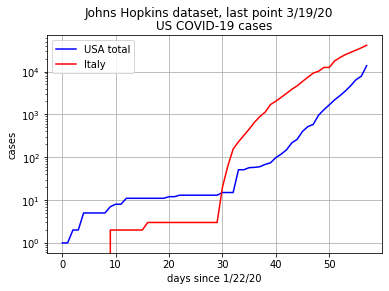

In [12]:
# Plot I posted to facebook:
plt.plot(ustotals, label='USA total', color='blue')
plt.plot(ddata['','Italy'], label='Italy', color='red')
plt.yscale('log')
plt.grid()
plt.title('US COVID-19 cases')
plt.ylabel('cases')
plt.xlabel('days since '+date_list[0])
plt.suptitle('Johns Hopkins dataset, last point '+date_list[-1] );
plt.legend()
plt.savefig('covid19cases-us-it.png')